# Statistiques descriptives 

## Modules utiles

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 


In [2]:
enedis_final=pd.read_csv("Données/enedis_final.csv")

In [3]:
enedis_final=enedis_final.loc[enedis_final["date"]<"2021-07-31"]

## 1. Dynamique annuelle (consommation électrique et météo)

#### Statistiques sur les températures

* Variation de la température par jour par région 
  

In [4]:
def temp_day_region(df,region):
    res=enedis_final[enedis_final["region_x"]==region].groupby("date")["tmoy"].mean()
    plt.plot(res, label= region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.title("Variation de la température par jour pour "+region,size=18)
    
    

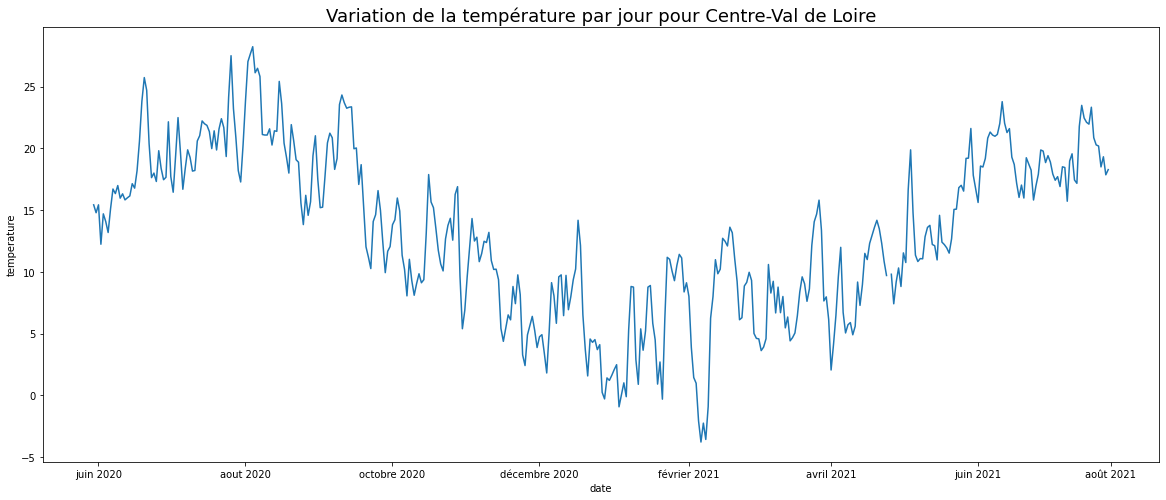

In [5]:
plt.figure(figsize=(20, 8))
temp_day_region(enedis_final,'Centre-Val de Loire')

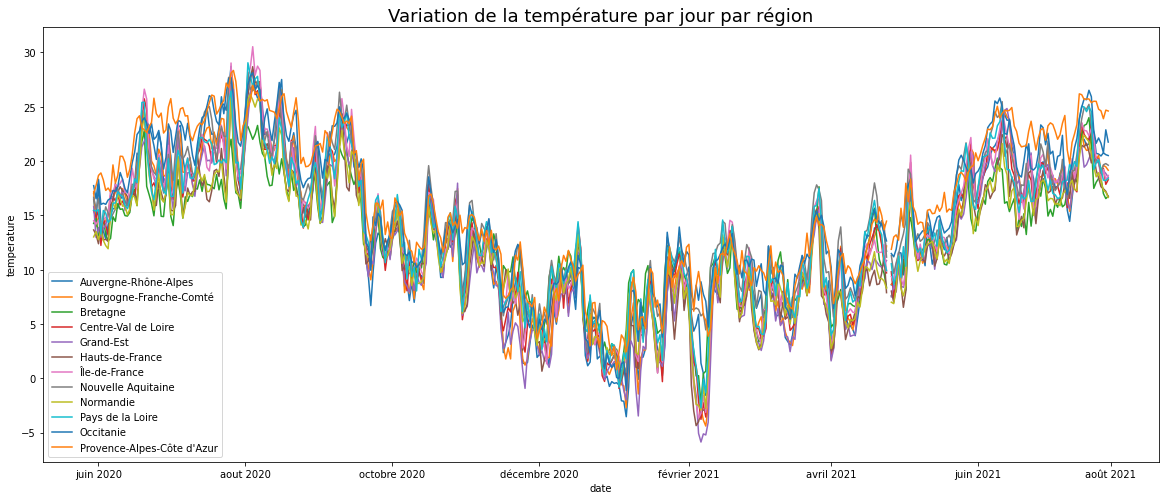

In [6]:
regions=list(enedis_final["region_x"].unique())

def temp_day_regions(df,regions):
    plt.figure(figsize=(20, 8))
    for region in regions:
        temp_day_region(enedis_final,region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.legend()
    plt.title("Variation de la température par jour par région",size=18)
    plt.show()

temp_day_regions(enedis_final,regions)

### Statistiques sur la consommation :

* Variation de la consommation électrique sur l'année pour la France 

In [33]:
def conso_day_france(df):
    nb_total_habitant=67750000

    res=df.groupby("date")["total_energie_soutiree_wh"].sum()
    res=res/nb_total_habitant
    print(res.mean())
    res=res/nb_total_habitant
    plt.figure(figsize=(20, 8))
    plt.grid(True)
    plt.plot(res,"c")

    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation totale moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique par habitant sur 1 an pour la France, profil ",size=18)
    plt.show

    

En moyenne, un ménage français consomme donc 12,5 KWh par jour (source : RTE). https://www.lenergietoutcompris.fr/actualites-conseils/quelle-est-la-consommation-delectricite-moyenne-par-jour-en-france#:~:text=En%20moyenne%2C%20un%20m%C3%A9nage%20fran%C3%A7ais,montre%20le%20tableau%20ci%2Ddessous.   

Avec nos données, nous trouvons une conso moyenne par ménage de 14kWh.

6031.913010664063


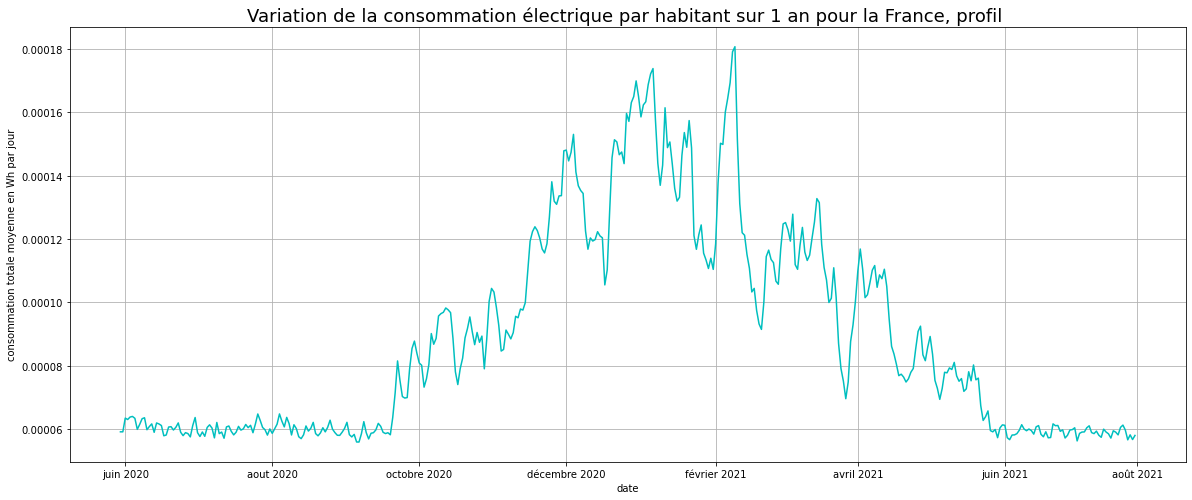

In [34]:

conso_day_france(enedis_final)


* Variation de la consommation électrique sur l'année par région

In [35]:
def conso_day_reg(df,region):
    res=df[df["region_x"]==region].groupby("date")["total_energie_soutiree_wh"].sum()
    menage=enedis_final[enedis_final["region_x"]==region]["Population au dernier recensement 2018"]
    nb_menage=menage.values[0]

    res=res/nb_menage
    print(res.mean())

    menage
    plt.figure(figsize=(20, 8))
    plt.grid(True)

    plt.plot(res,"c")
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation totale moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique moyenne par habitant sur 1 an pour "+region,size=18)
    plt.show
    

7944.901983392161


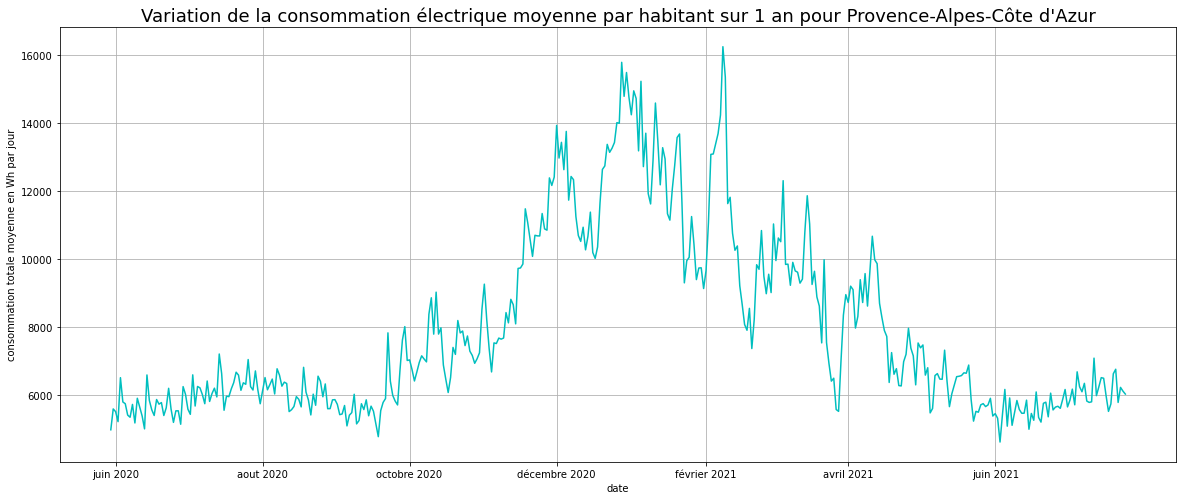

In [36]:
conso_day_reg(enedis_final,"Provence-Alpes-Côte d'Azur")

7944.901983392161
5506.979803550191
4994.010729757703
7944.901983392161
5506.979803550191
4994.010729757703


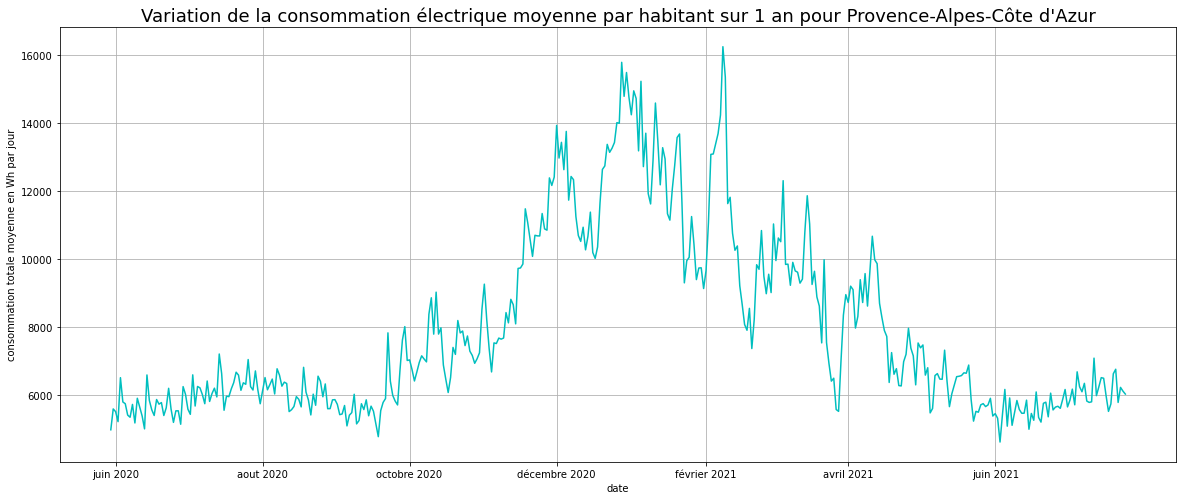

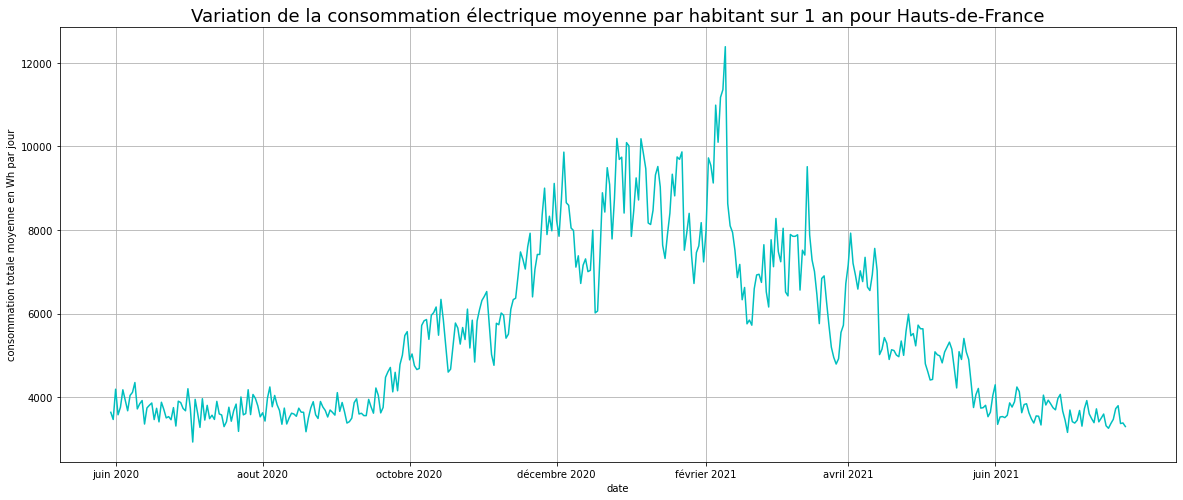

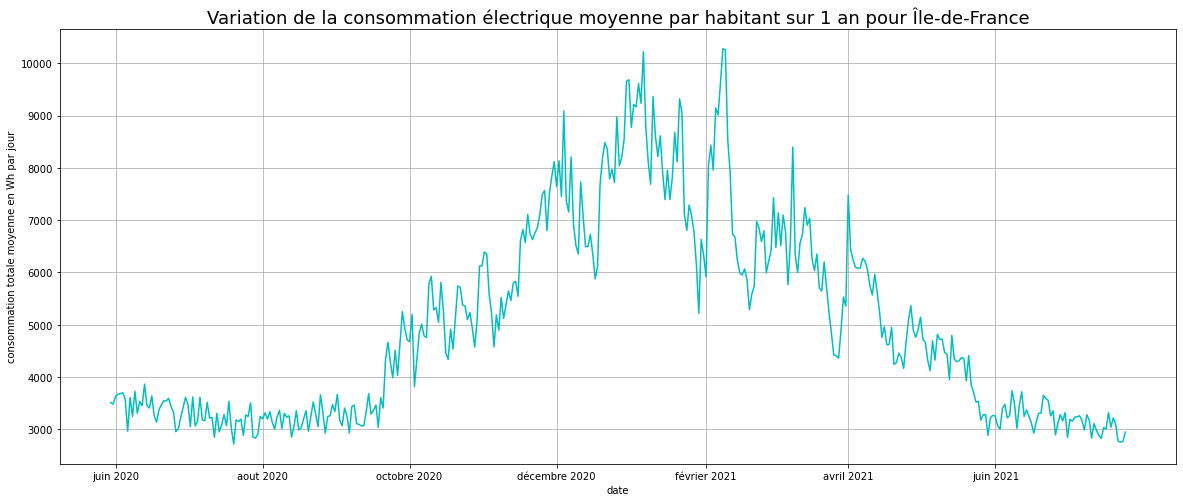

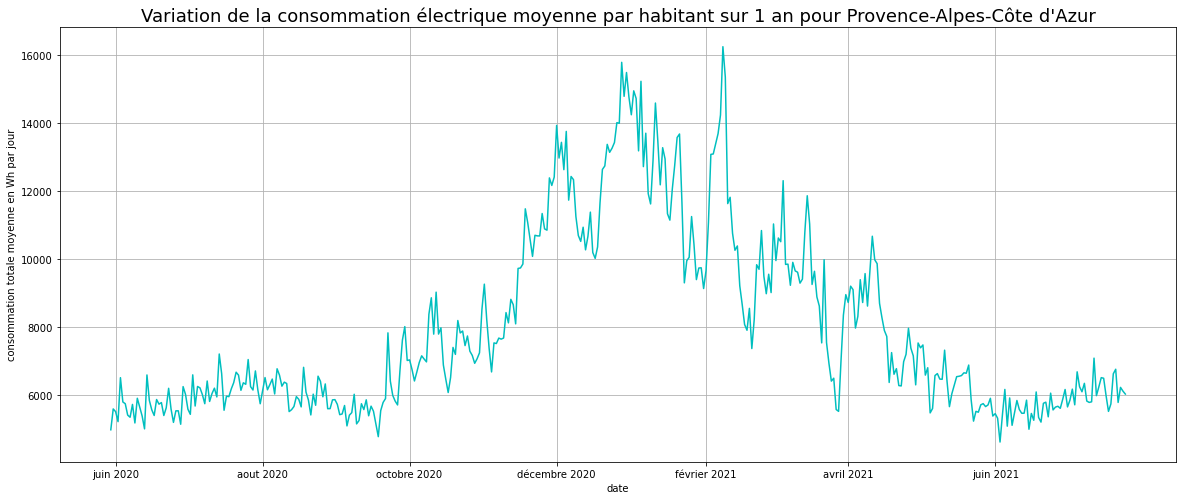

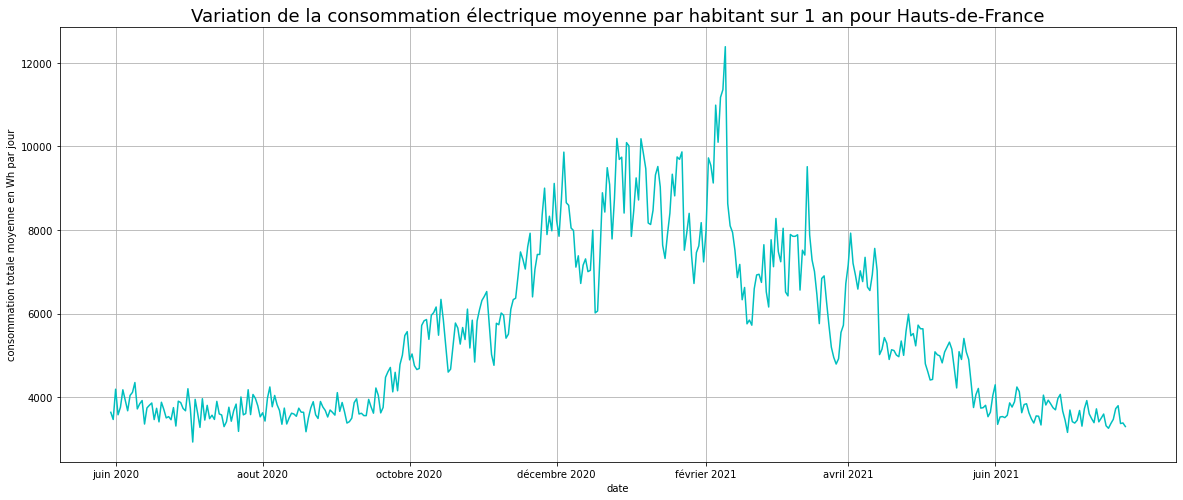

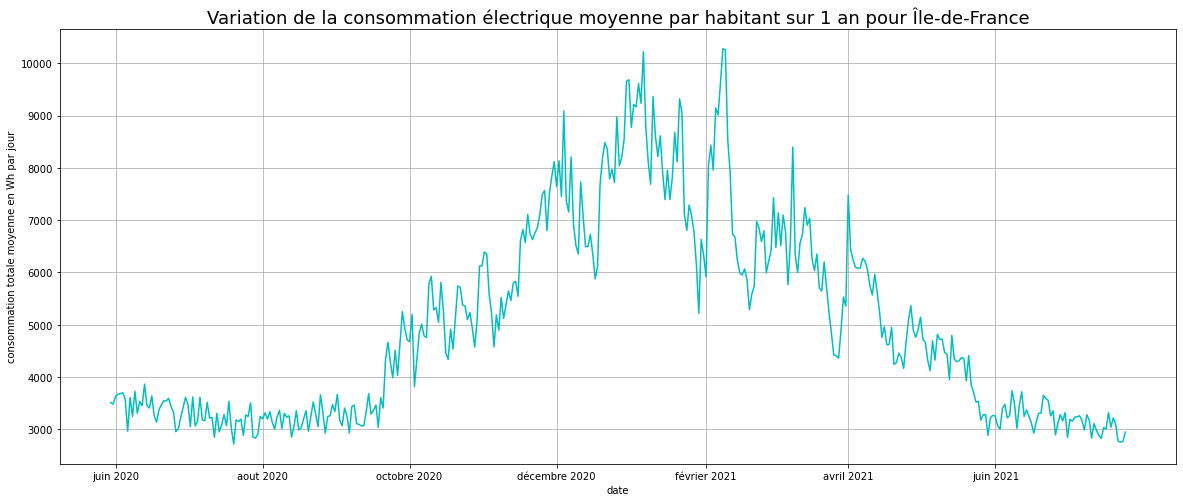

In [37]:
conso_day_reg(enedis_final,"Provence-Alpes-Côte d'Azur")
conso_day_reg(enedis_final,'Hauts-de-France')
conso_day_reg(enedis_final,'Île-de-France')

conso_day_reg(enedis_final,"Provence-Alpes-Côte d'Azur")
conso_day_reg(enedis_final,'Hauts-de-France')
conso_day_reg(enedis_final,'Île-de-France')

* Corrélation température/consommation électrique, par région 

In [12]:
def corr_total_energie_temperature(df,region):
    plt.figure(figsize=(20, 8))
    plt.ylabel("total moyen d'énergie soutirée par jour (Wh)")
    plt.xlabel('temperature')
    plt.legend()
    plt.grid(True)
    plt.title("Corrélation entre température moyenne et totale moyen d'énergie moyenne soutirée par ménage et par jour pour "+region,size=18)

    X1=df[df["region_x"]==region].groupby("date")["tmoy"].mean() # moyenne des températures par jour
    X2=df[df["region_x"]==region].groupby("date")["total_energie_soutiree_wh"].sum() # moyenne énergie soutirée par jour 
    menage=enedis_final[enedis_final["region_x"]==region]["Ensemble"]
    nb_menage=menage.values[0]
    X2=X2/nb_menage

    plt.plot(X1,X2,"oc")

    plt.show()
    correlation=X1.corr(X2)
    print("La corrélation est de " +str(correlation))
    

No handles with labels found to put in legend.


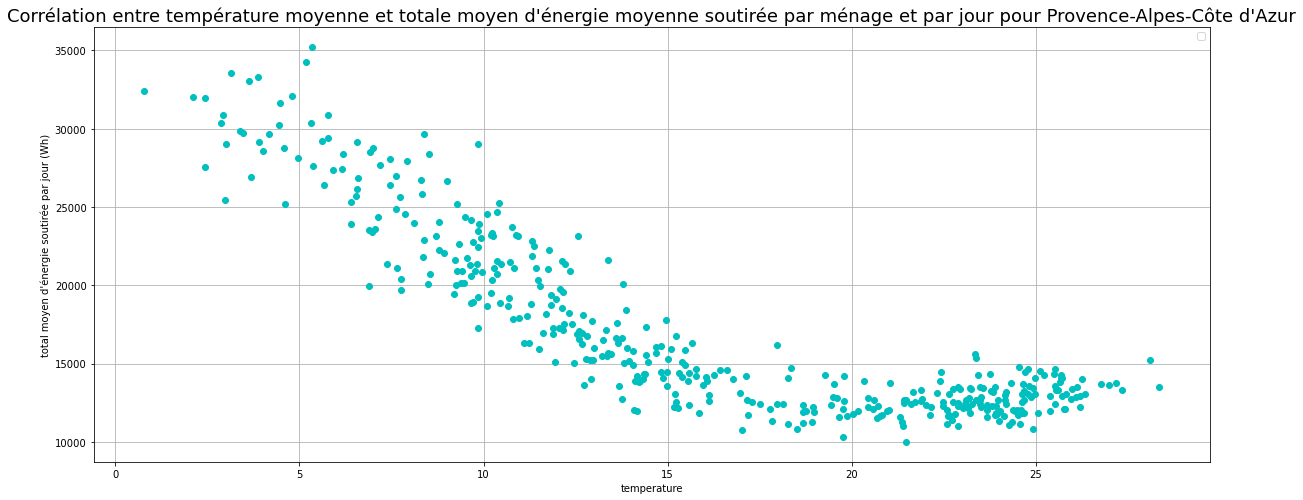

No handles with labels found to put in legend.


La corrélation est de -0.8570516072726629


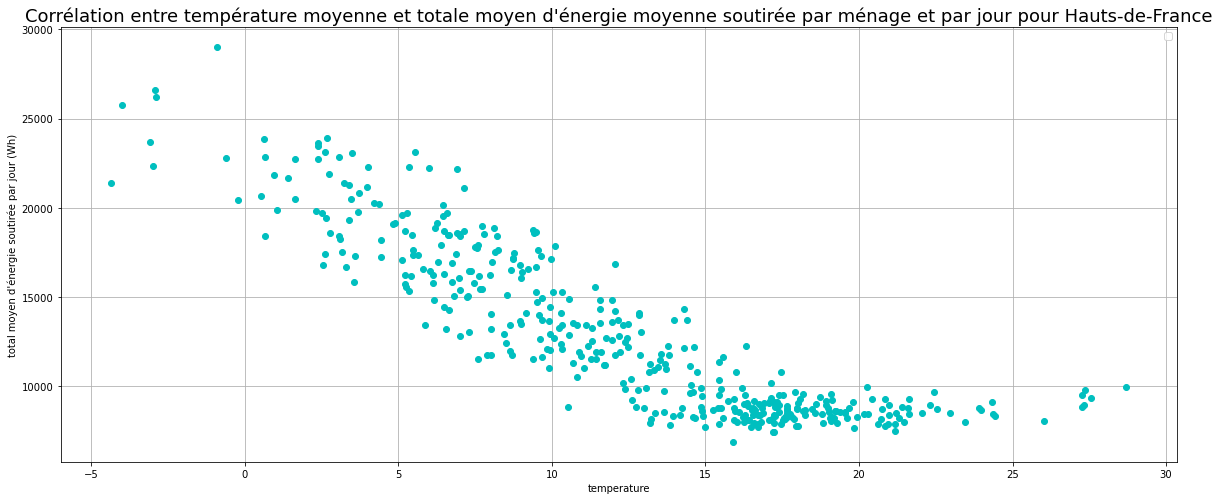

No handles with labels found to put in legend.


La corrélation est de -0.8850102091202477


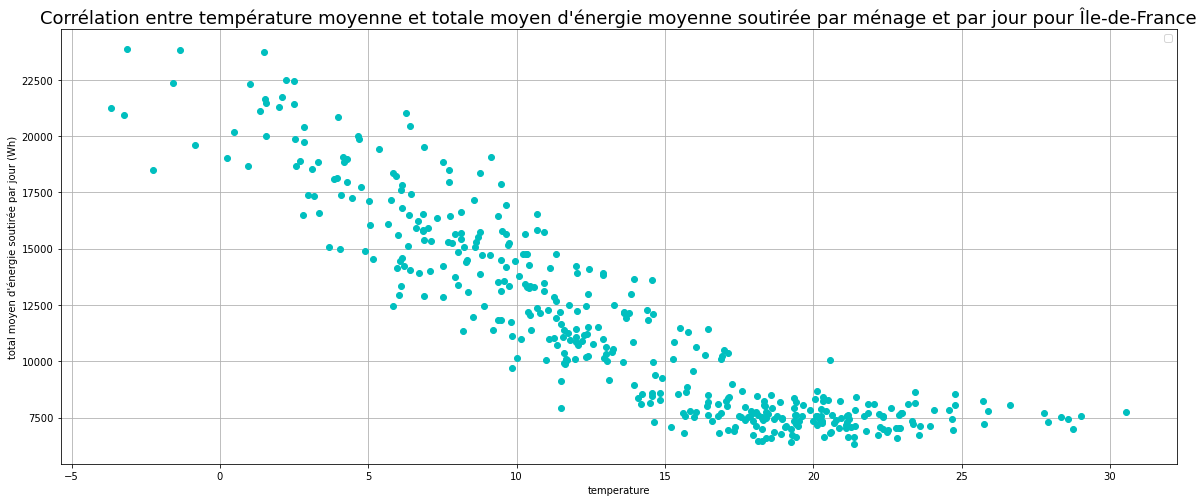

La corrélation est de -0.9013080114247976


In [13]:
# Les points correspondent à un jour : donc il y a plus de 365 points
#pour PACA, plus d'énergie soutirée en été à partir de 25 degrés que pour d'autres régions (effet clim) (600kW)

corr_total_energie_temperature(enedis_final,"Provence-Alpes-Côte d'Azur")
corr_total_energie_temperature(enedis_final,"Hauts-de-France")
corr_total_energie_temperature(enedis_final,"Île-de-France")




## 2. Dynamique saisonnière 

In [14]:
enedis_final["mois"]=enedis_final["date"].apply(lambda x : x[5:7])


In [15]:
ete=enedis_final[(enedis_final["mois"]=="06")|(enedis_final["mois"]=="07")|(enedis_final["mois"]=="08")]

automne=enedis_final[(enedis_final["mois"]=="09")|(enedis_final["mois"]=="10")|(enedis_final["mois"]=="11")]

hiver=enedis_final[(enedis_final["mois"]=="12")|(enedis_final["mois"]=="01")|(enedis_final["mois"]=="02")]

printemps=enedis_final[(enedis_final["mois"]=="03")|(enedis_final["mois"]=="04")|(enedis_final["mois"]=="05")]

### Données pour les quantiles :


In [16]:
enedis_final.total_energie_soutiree_wh.describe()
# Premier quantile de conso = 1.269489e+06
# Troisième quantile de conso = 2.349043e+07 


count    4.574691e+06
mean     3.769772e+07
std      1.001486e+08
min      1.747800e+04
25%      9.047860e+05
50%      3.679776e+06
75%      1.921082e+07
max      1.703105e+09
Name: total_energie_soutiree_wh, dtype: float64

In [17]:
haute_conso_Q1=enedis_final[enedis_final.total_energie_soutiree_wh<=1.269489e+06]
haute_conso_Q3=enedis_final[enedis_final.total_energie_soutiree_wh<=2.349043e+07]

In [18]:

ete_Q1=haute_conso_Q1[(haute_conso_Q1["mois"]=="06")|(haute_conso_Q1["mois"]=="07")|(haute_conso_Q1["mois"]=="08")]

automne_Q1=haute_conso_Q1[(haute_conso_Q1["mois"]=="09")|(haute_conso_Q1["mois"]=="10")|(haute_conso_Q1["mois"]=="11")]

hiver_Q1=haute_conso_Q1[(haute_conso_Q1["mois"]=="12")|(haute_conso_Q1["mois"]=="01")|(haute_conso_Q1["mois"]=="02")]

printemps_Q1=haute_conso_Q1[(haute_conso_Q1["mois"]=="03")|(haute_conso_Q1["mois"]=="04")|(haute_conso_Q1["mois"]=="05")]


In [19]:

ete_Q3=haute_conso_Q3[(haute_conso_Q3["mois"]=="06")|(haute_conso_Q3["mois"]=="07")|(haute_conso_Q3["mois"]=="08")]

automne_Q3=haute_conso_Q3[(haute_conso_Q3["mois"]=="09")|(haute_conso_Q3["mois"]=="10")|(haute_conso_Q3["mois"]=="11")]

hiver_Q3=haute_conso_Q3[(haute_conso_Q3["mois"]=="12")|(haute_conso_Q3["mois"]=="01")|(haute_conso_Q3["mois"]=="02")]

printemps_Q3=haute_conso_Q3[(haute_conso_Q3["mois"]=="03")|(haute_conso_Q3["mois"]=="04")|(haute_conso_Q3["mois"]=="05")]

#### Molaire conso totale moyenne d'un jour de la saison par ménage : 

In [32]:
# molaire conso moyenne par heure pour chaque jour de la saison
def molaire_saison(data_saison,region,saison,color):
    conso_saison_region=data_saison[data_saison["region_x"]==region]

    conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

    total_conso_saison_region=conso_saison_region.groupby(["date","heure"])["total_energie_soutiree_wh"].sum().reset_index() # pour chaque jour, on calcule la conso totale pour chaque heure
    total_conso_saison_region=total_conso_saison_region.groupby("heure")["total_energie_soutiree_wh"].mean() # on fait une moyenne (temporelle) du profil de conso totale sur la saison
    
    menage=enedis_final[enedis_final["region_x"]==region]["Ensemble"] #ménage ou population ?
    total_conso_saison_region=total_conso_saison_region/menage.values[0]

    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    plt.plot(total_conso_saison_region,color,label=saison)
    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"]
    plt.xticks(t2,["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation d'énergie")
    plt.grid(True)
    plt.title('Molaire pour la saison '+saison+", région "+region,size=25)
   

haute=[ete,automne,hiver,printemps]

def molaire_toute_saison(region,type_conso):
    plt.figure(figsize=(20, 8))
    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    

    if type_conso=="toutes conso":
        molaire_saison(ete,region,"été","orangered")
        molaire_saison(automne,region,"automne","brown")
        molaire_saison(hiver,region,"hiver","c")
        molaire_saison(printemps,region,"printemps","green")

        

    elif type_conso=="Q1 Q3":
        molaire_saison(ete_Q1,region,"été_Q1","orangered")
        molaire_saison(automne_Q1,region,"automne_Q1","peru")
        molaire_saison(hiver_Q1,region,"hiver_Q1","royalblue")
        molaire_saison(printemps_Q1,region,"printemps_Q1","yellowgreen")

        molaire_saison(ete_Q3,region,"été_Q3","orangered")
        molaire_saison(automne_Q3,region,"automne_Q3","brown")
        molaire_saison(hiver_Q3,region,"hiver_Q3","c")
        molaire_saison(printemps_Q3,region,"printemps_Q3","green")
    

    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:30"]
    plt.xticks(t2,["00:00","04:00","8:00","12:00","15:00","18:00","21:00","23:30"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation totale d'énergie")
    plt.legend()
    plt.title("Molaire de consommation d'un ménage par saison pour la région "+region+" pour "+type_conso,size=25)
   
    plt.show()
   

<ipython-input-20-989daa0a29c8>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-20-989daa0a29c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-20-989daa0a29c8>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


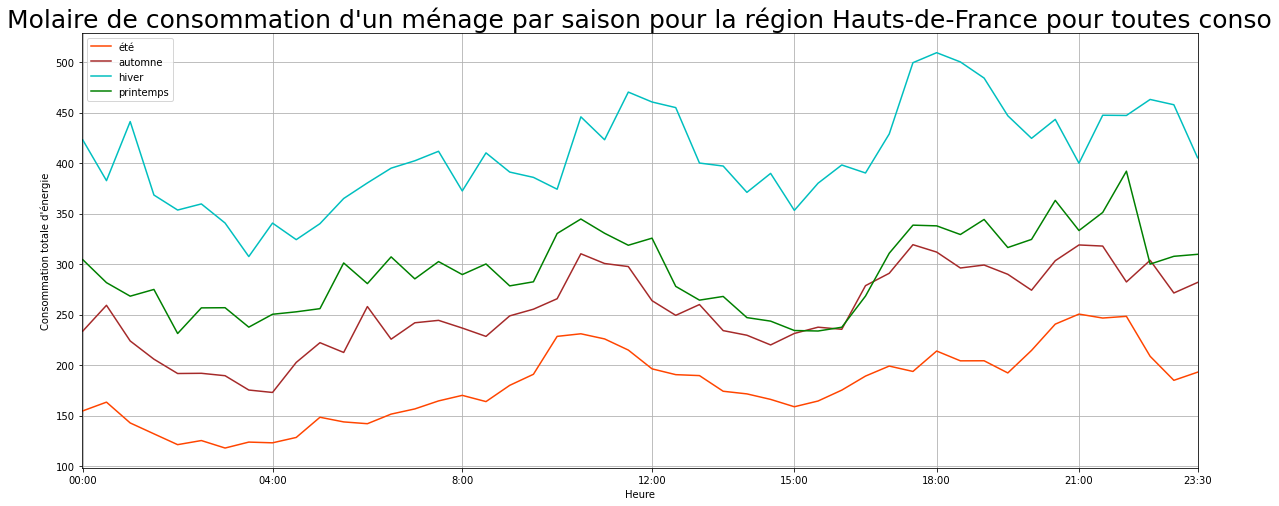

In [21]:
molaire_toute_saison("Hauts-de-France","toutes conso")

<ipython-input-20-989daa0a29c8>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-20-989daa0a29c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-20-989daa0a29c8>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


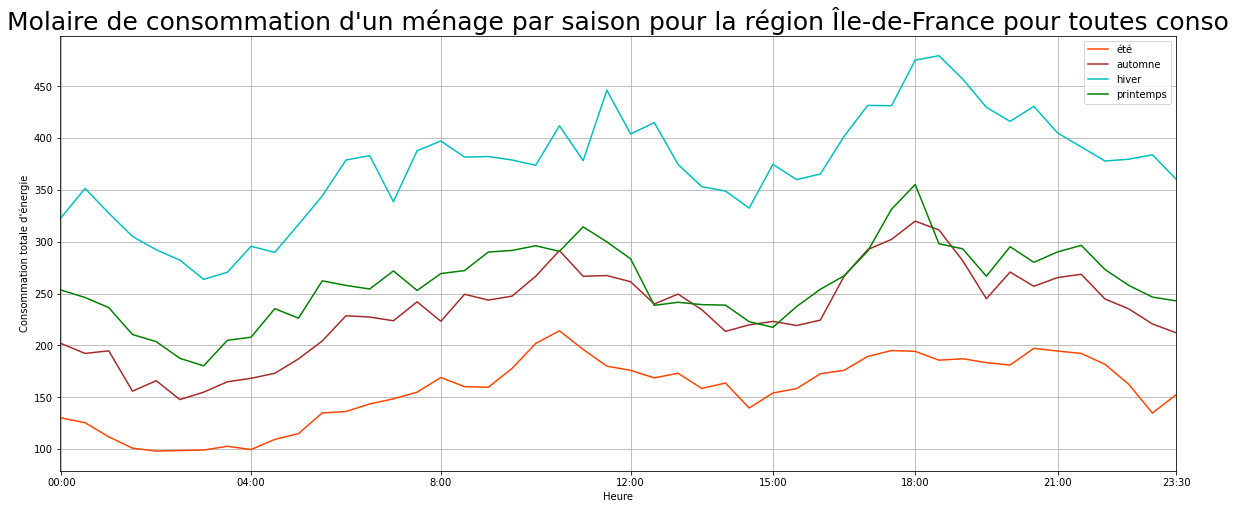

In [22]:
molaire_toute_saison("Île-de-France","toutes conso")

<ipython-input-20-989daa0a29c8>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-20-989daa0a29c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-20-989daa0a29c8>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


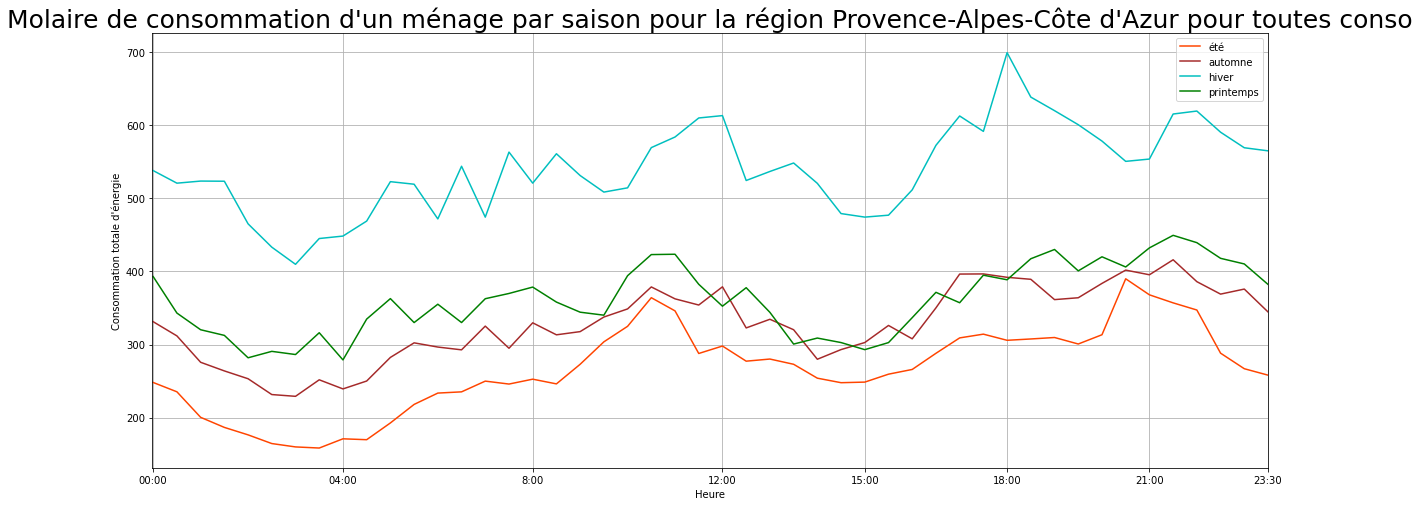

In [23]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","toutes conso")

<ipython-input-20-989daa0a29c8>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-20-989daa0a29c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-20-989daa0a29c8>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


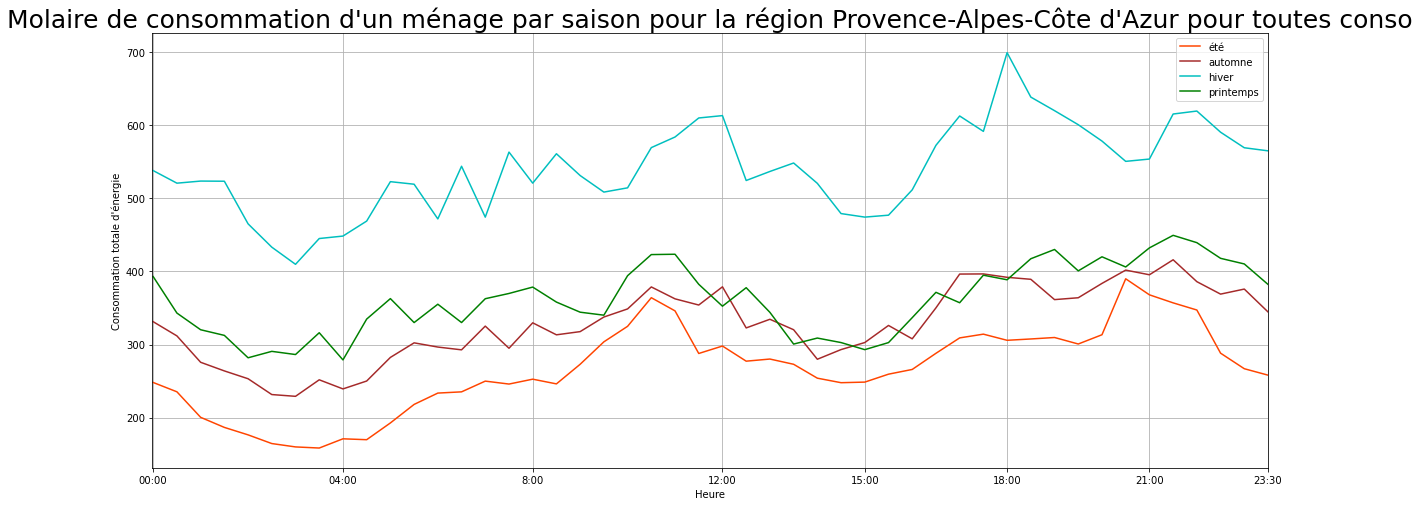

In [24]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","toutes conso")

<ipython-input-20-989daa0a29c8>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-20-989daa0a29c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-20-989daa0a29c8>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


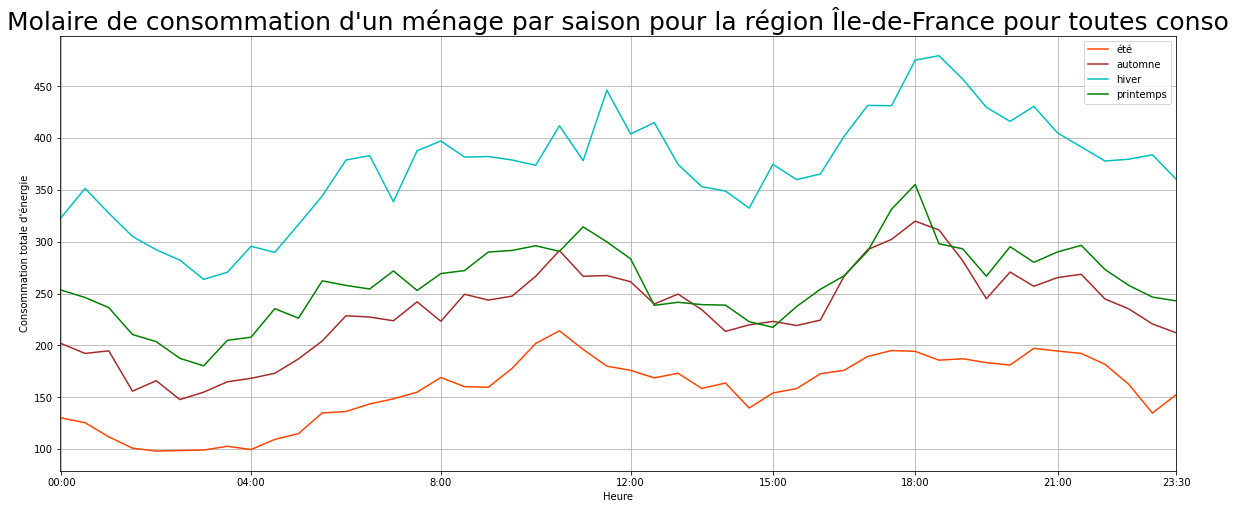

In [25]:
molaire_toute_saison("Île-de-France","toutes conso")

<ipython-input-20-989daa0a29c8>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-20-989daa0a29c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-20-989daa0a29c8>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


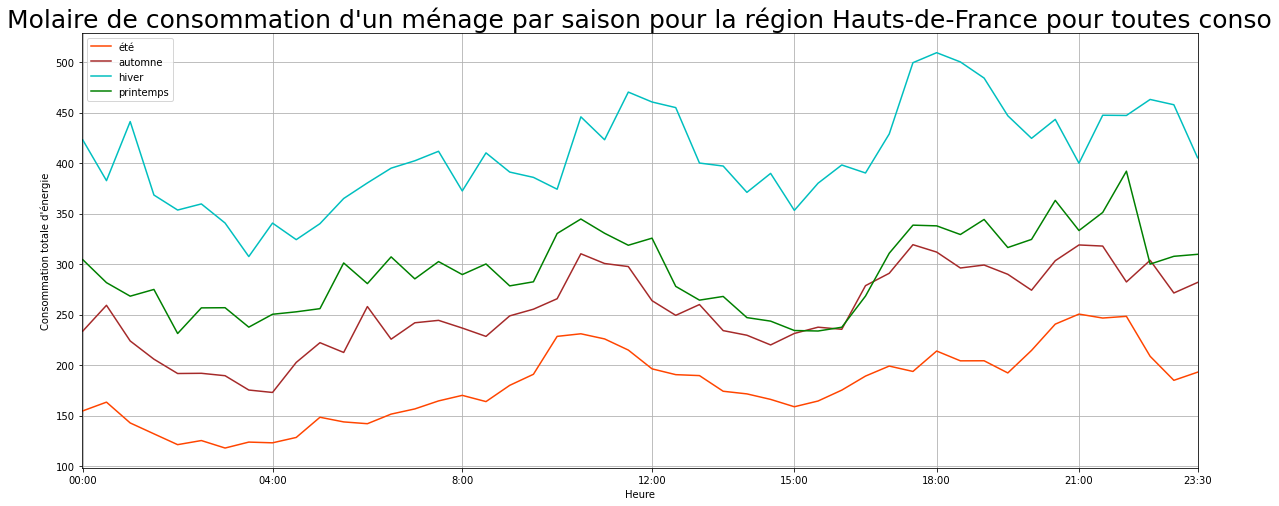

In [26]:
molaire_toute_saison("Hauts-de-France","toutes conso")

### Molaire de la consommation électrique moyenne par jour d'une même saison et par habitants

In [28]:
# molaire conso moyenne par heure pour chaque jour de la saison par habitant
def molaire_saison_habitant(data_saison,region,saison,color):
    conso_saison_region=data_saison[data_saison["region_x"]==region]

    conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

    total_conso_saison_region=conso_saison_region.groupby(["date","heure"])["total_energie_soutiree_wh"].sum().reset_index() # pour chaque jour, on calcule la conso totale pour chaque heure
    total_conso_saison_region=total_conso_saison_region.groupby("heure")["total_energie_soutiree_wh"].mean() # on fait une moyenne (temporelle) du profil de conso totale sur la saison
    
    population=enedis_final[enedis_final["region_x"]==region]["Population au dernier recensement 2018"] #ménage ou population ?
    total_conso_saison_region=total_conso_saison_region/population.values[0]

    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    plt.plot(total_conso_saison_region,color,label=saison)
    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"]
    plt.xticks(t2,["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation d'énergie")
    plt.grid(True)
    plt.title('Molaire pour la saison '+saison+", région "+region,size=25)
   

haute=[ete,automne,hiver,printemps]

def molaire_toute_saison_habitant(region,type_conso):
    plt.figure(figsize=(20, 8))
    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    

    if type_conso=="toutes conso":
        molaire_saison_habitant(ete,region,"été","orangered")
        molaire_saison_habitant(automne,region,"automne","brown")
        molaire_saison_habitant(hiver,region,"hiver","c")
        molaire_saison_habitant(printemps,region,"printemps","green")

        

    elif type_conso=="Q1 Q3":
        molaire_saison_habitant(ete_Q1,region,"été_Q1","orangered")
        molaire_saison_habitant(automne_Q1,region,"automne_Q1","peru")
        molaire_saison_habitant(hiver_Q1,region,"hiver_Q1","royalblue")
        molaire_saison_habitant(printemps_Q1,region,"printemps_Q1","yellowgreen")

        molaire_saison_habitant(ete_Q3,region,"été_Q3","orangered")
        molaire_saison_habitant(automne_Q3,region,"automne_Q3","brown")
        molaire_saison_habitant(hiver_Q3,region,"hiver_Q3","c")
        molaire_saison_habitant(printemps_Q3,region,"printemps_Q3","green")
    

    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:30"]
    plt.xticks(t2,["00:00","04:00","8:00","12:00","15:00","18:00","21:00","23:30"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation totale d'énergie")
    plt.legend()
    plt.title("Molaire de consommation d'un habitant par saison pour la région "+region+" pour "+type_conso,size=25)
   
    plt.show()
   

<ipython-input-28-5ee48af2159a>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-28-5ee48af2159a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-28-5ee48af2159a>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


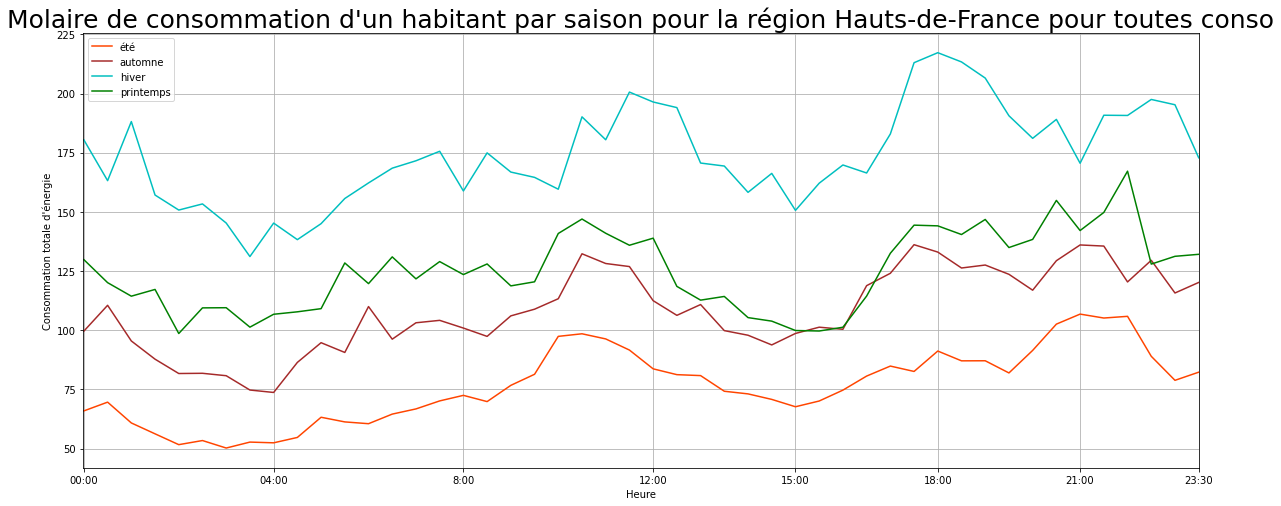

In [29]:
molaire_toute_saison("Hauts-de-France","toutes conso")

<ipython-input-28-5ee48af2159a>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-28-5ee48af2159a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-28-5ee48af2159a>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


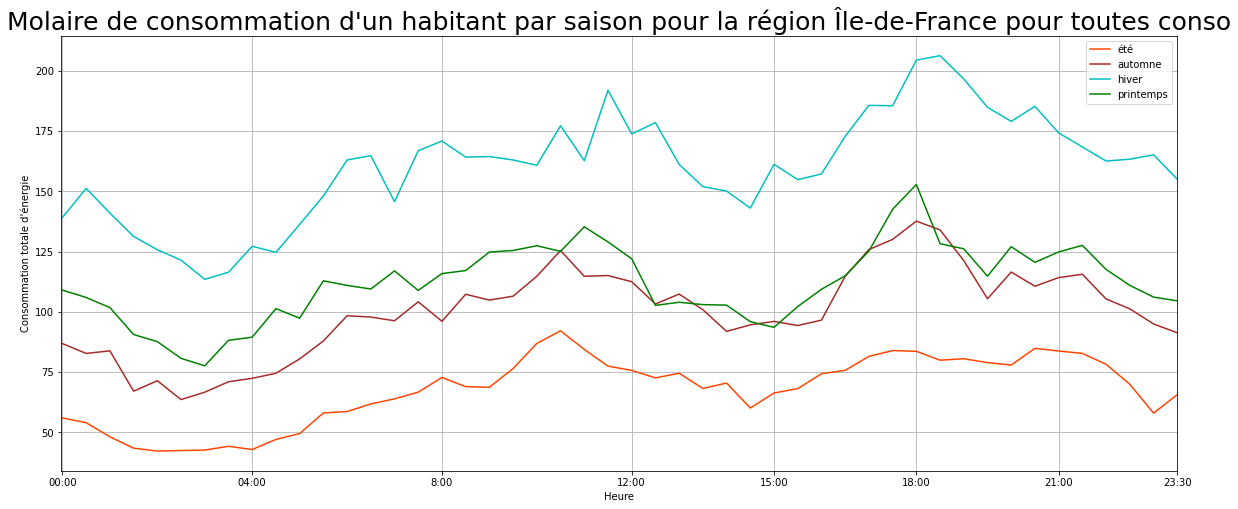

In [30]:
molaire_toute_saison("Île-de-France","toutes conso")

<ipython-input-28-5ee48af2159a>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-28-5ee48af2159a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-28-5ee48af2159a>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


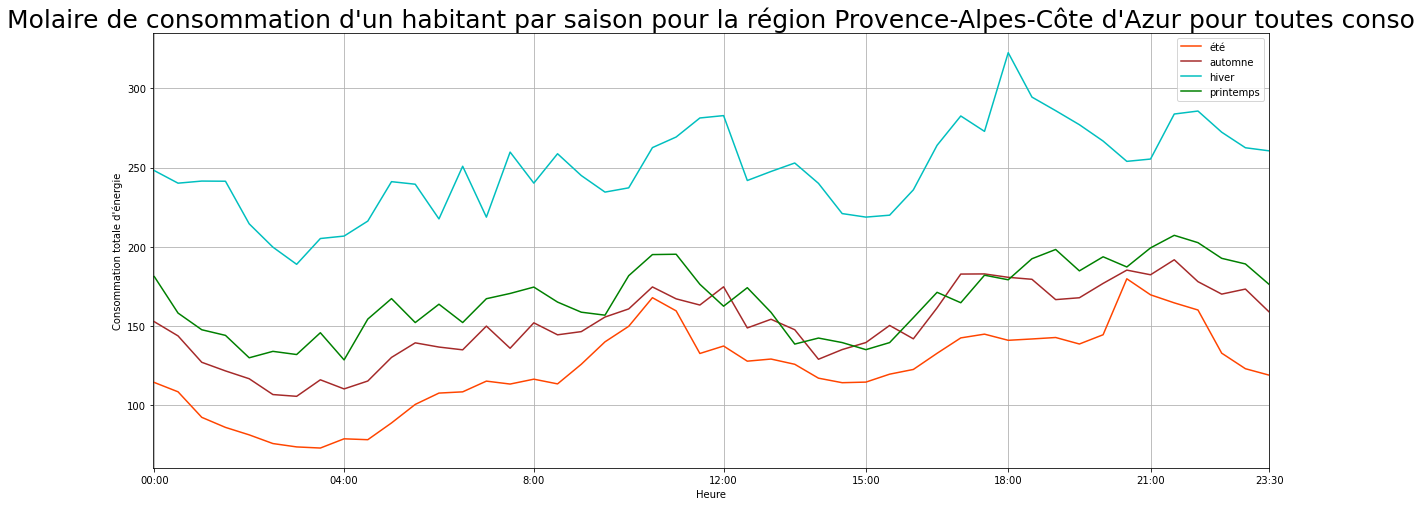

In [31]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","toutes conso")